<a href="https://colab.research.google.com/github/SlavaKulik/machine_learning/blob/main/machine_learning_practice_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

n_samples = 1000
random_state = 150

blobs_1 = datasets.make_blobs(n_samples=n_samples, random_state=10)
blobs_2 = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
wine = datasets.load_wine(return_X_y=True, as_frame=True)

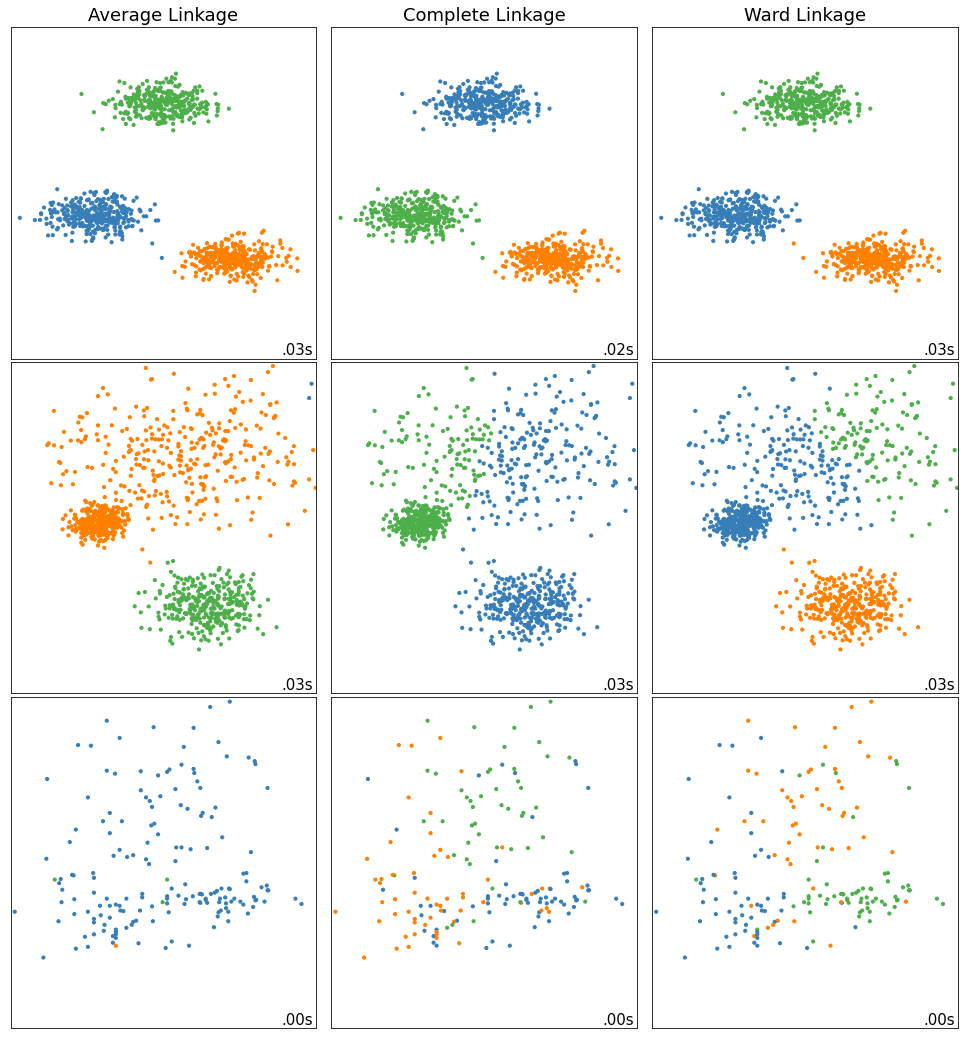

In [16]:
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (blobs_1, {}),
    (blobs_2, {}),
    (wine, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset
    X = StandardScaler().fit_transform(X)

    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )

    clustering_algorithms = (
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

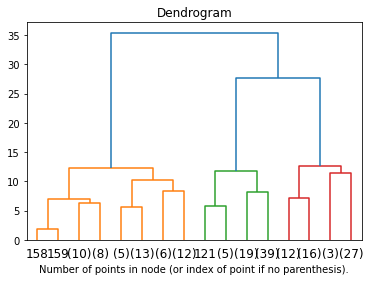

In [27]:
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

wine = datasets.load_wine()
dataset = pd.DataFrame(wine.data, columns=wine.feature_names)
sc = StandardScaler()
dataset = sc.fit_transform(dataset)
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(dataset)

plt.title("Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [32]:
from sklearn.metrics import adjusted_mutual_info_score
print("Adjusted Mutual Information")
print("Ward Linkage")
print(adjusted_mutual_info_score(wine.target, ward.labels_))
print("Average Linkage")
print(adjusted_mutual_info_score(wine.target, average.labels_))
print("Complete Linkage")
print(adjusted_mutual_info_score(wine.target, complete.labels_))

Adjusted Mutual Information
Ward Linkage
0.7842084168747391
Average Linkage
-0.003782863128381967
Complete Linkage
0.6102895229970114


In [33]:
from sklearn.metrics import adjusted_rand_score
print("Adjusted Rand Index:")
print("Ward Linkage")
print(adjusted_rand_score(wine.target, ward.labels_))
print("Average Linkage")
print(adjusted_rand_score(wine.target, average.labels_))
print("Complete Linkage")
print(adjusted_rand_score(wine.target, complete.labels_))

Adjusted Rand Index:
Ward Linkage
0.7899332213582837
Average Linkage
-0.005441973296580639
Complete Linkage
0.5771435822032458
